In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tueplots import bundles
plt.rcParams.update(bundles.neurips2024())

In [ ]:
name_match = {
    "fno": "FNO",
    "tfno": "TFNO",
    "unet_classic": "U-net",
    "unet_convnext": "UConvNext"
}
def format_name(name):
    name = name.split("-")[1]
    return name_match[name]

# Pattern Formation

In [17]:
low_freq_df = pd.read_csv("pattern_formation_spectral_bin_0.csv")
med_freq_df = pd.read_csv("pattern_formation_spectral_bin_1.csv")
high_freq_df = pd.read_csv("pattern_formation_spectral_bin_2.csv")
low_freq_df.name = low_freq_df.name.apply(format_name)
med_freq_df.name = med_freq_df.name.apply(format_name)
high_freq_df.name = high_freq_df.name.apply(format_name)

low_freq_df.head()

_defaultColorIndex        id      loss name  time_step
0                   6  28nsuzix  1.007625  FNO          0
1                   6  28nsuzix  1.005581  FNO          1
2                   6  28nsuzix  1.002825  FNO          2
3                   6  28nsuzix  1.002817  FNO          3
4                   6  28nsuzix  1.003386  FNO          4

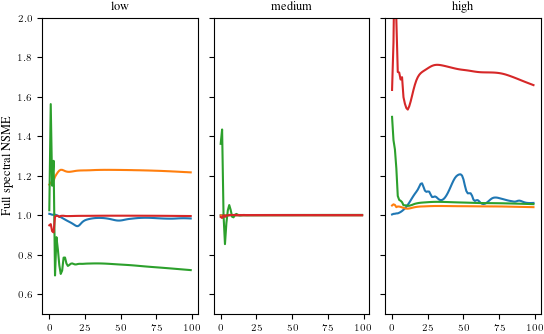

In [35]:
fig, axes = plt.subplots(ncols=3, sharey=True, sharex=True)
for ax, df, freq in zip(axes, [low_freq_df, med_freq_df, high_freq_df], ["low", "medium", "high"]):
    for model_name in sorted(name_match.values()):
        data = df.loc[df.name == model_name, ["time_step", "loss"]]
        ax.plot(data.time_step.values, data.loss.values, label=model_name)
        ax.set_title(freq)
ax.set_ylim([0.5, 2])
axes[0].set_ylabel("Full spectral NSME")
# fig.legend(labels=sorted(name_match.values()))
fig.savefig("pattern_formation.png")
plt.show()

# MHD

In [36]:
low_freq_df = pd.read_csv("mhd_spectral_bin_0.csv")
med_freq_df = pd.read_csv("mhd_spectral_bin_1.csv")
high_freq_df = pd.read_csv("mhd_spectral_bin_2.csv")
low_freq_df.name = low_freq_df.name.apply(format_name)
med_freq_df.name = med_freq_df.name.apply(format_name)
high_freq_df.name = high_freq_df.name.apply(format_name)

low_freq_df.head()

_defaultColorIndex        id      loss       name  time_step
0                   2  odglqk9s  0.003699  UConvNext          0
1                   2  odglqk9s  0.034810  UConvNext          1
2                   2  odglqk9s  0.128313  UConvNext          2
3                   2  odglqk9s  0.307808  UConvNext          3
4                   2  odglqk9s  0.585359  UConvNext          4

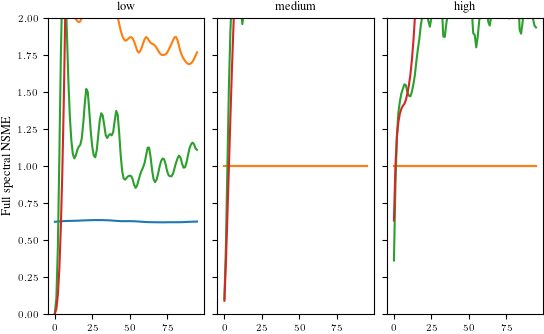

In [42]:
fig, axes = plt.subplots(ncols=3, sharey=True, sharex=True)
for ax, df, freq in zip(axes, [low_freq_df, med_freq_df, high_freq_df], ["low", "medium", "high"]):
    for model_name in sorted(name_match.values()):
        data = df.loc[df.name == model_name, ["time_step", "loss"]]
        ax.plot(data.time_step.values, data.loss.values, label=model_name)
        ax.set_title(freq)
ax.set_ylim([0, 2])
axes[0].set_ylabel("Full spectral NSME")
# fig.legend(labels=sorted(name_match.values()))
fig.savefig("mhd.png")
plt.show()